In [1]:
!git clone --branch train-ua https://github.com/taras-sereda/pheme.git

Cloning into 'pheme'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 230 (delta 35), reused 35 (delta 22), pack-reused 172
Receiving objects: 100% (230/230), 10.04 MiB | 36.86 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
!pip3 install torch torchvision torchaudio
!pip3 install docker_pycreds
!pip3 install sentry_sdk
!pip3 install -U wandb>=0.12.10

In [3]:
!git clone https://github.com/espeak-ng/espeak-ng.git

Cloning into 'espeak-ng'...
remote: Enumerating objects: 48498, done.
remote: Counting objects: 100% (502/502), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 48498 (delta 246), reused 366 (delta 170), pack-reused 47996
Receiving objects: 100% (48498/48498), 59.65 MiB | 29.07 MiB/s, done.
Resolving deltas: 100% (33544/33544), done.


In [4]:
!apt-get install make autoconf automake libtool pkg-config -y
!apt-get install gcc -y
!apt-get install libsonic-dev -y
!apt-get install ronn -y
!apt-get install kramdown -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
make is already the newest version (4.2.1-1.2).
make set to manually installed.
pkg-config is already the newest version (0.29.1-0ubuntu4).
The following additional packages will be installed:
  autotools-dev file libltdl-dev libmagic-mgc libmagic1 libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext libtool-doc gfortran
  | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev file libltdl-dev libmagic-mgc libmagic1
  libsigsegv2 libtool m4
0 upgraded, 10 newly installed, 0 to remove and 65 not upgraded.
Need to get 1736 kB of archives.
After this operation, 12.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic-mgc amd64 1:5.38-4 [218 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmagic1 amd64 1:5.38-4 [75.9 kB]
Get:3 http:

In [5]:
%cd espeak-ng
!./autogen.sh
!./configure --prefix=/usr

/kaggle/working/espeak-ng
libtoolize: putting auxiliary files in '.'.
libtoolize: copying file './ltmain.sh'
libtoolize: putting macros in AC_CONFIG_MACRO_DIRS, 'm4'.
libtoolize: copying file 'm4/libtool.m4'
libtoolize: copying file 'm4/ltoptions.m4'
libtoolize: copying file 'm4/ltsugar.m4'
libtoolize: copying file 'm4/ltversion.m4'
libtoolize: copying file 'm4/lt~obsolete.m4'
configure.ac:4: installing './compile'
configure.ac:4: installing './config.guess'
configure.ac:4: installing './config.sub'
configure.ac:3: installing './install-sh'
configure.ac:3: installing './missing'
Makefile.am:112: warning: shell dirname $@: non-POSIX variable name
Makefile.am:112: (probably a GNU make extension)
Makefile.am:115: warning: shell dirname $@: non-POSIX variable name
Makefile.am:115: (probably a GNU make extension)
Makefile.am:117: warning: wildcard docs/*.md: non-POSIX variable name
Makefile.am:117: (probably a GNU make extension)
Makefile.am:117: warning: wildcard docs/*/*.md: non-POSIX var

In [6]:
!make

make  all-am
make[1]: Entering directory '/kaggle/working/espeak-ng'
  CC       src/speak-ng.o
In file included from src/speak-ng.c:23:
src/espeak-ng.c: In function 'main':
src/espeak-ng.c:777:3: warning: ignoring return value of 'fread', declared with attribute warn_unused_result [-Wunused-result]
  777 |   fread(p_text, 1, filesize, f_text);
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  CC       src/ucd-tools/src/libespeak_ng_la-case.lo
  CC       src/ucd-tools/src/libespeak_ng_la-categories.lo
  CC       src/ucd-tools/src/libespeak_ng_la-ctype.lo
  CC       src/ucd-tools/src/libespeak_ng_la-proplist.lo
  CC       src/ucd-tools/src/libespeak_ng_la-scripts.lo
  CC       src/ucd-tools/src/libespeak_ng_la-tostring.lo
  CC       src/libespeak-ng/la-common.lo
  CC       src/libespeak-ng/la-compiledata.lo
src/libespeak-ng/compiledata.c: In function 'LoadDataFile.part.0':
src/libespeak-ng/compiledata.c:923:40: warning: '%s' directive output may be truncated writing up to 199 bytes into a r

In [7]:
!ESPEAK_DATA_PATH=`pwd` LD_LIBRARY_PATH=src:${LD_LIBRARY_PATH} src/espeak-ng ...
!make LIBDIR=/usr/lib/x86_64-linux-gnu install

make: Circular phsource/phonemes.stamp <- phsource/phonemes.stamp dependency dropped.
make[1]: Entering directory '/kaggle/working/espeak-ng'
 /usr/bin/mkdir -p '/usr/lib'
 /bin/bash ./libtool   --mode=install /usr/bin/install -c   src/libespeak-ng.la '/usr/lib'
libtool: install: /usr/bin/install -c src/.libs/libespeak-ng.so.1.1.51 /usr/lib/libespeak-ng.so.1.1.51
libtool: install: (cd /usr/lib && { ln -s -f libespeak-ng.so.1.1.51 libespeak-ng.so.1 || { rm -f libespeak-ng.so.1 && ln -s libespeak-ng.so.1.1.51 libespeak-ng.so.1; }; })
libtool: install: (cd /usr/lib && { ln -s -f libespeak-ng.so.1.1.51 libespeak-ng.so || { rm -f libespeak-ng.so && ln -s libespeak-ng.so.1.1.51 libespeak-ng.so; }; })
libtool: install: /usr/bin/install -c src/.libs/libespeak-ng.lai /usr/lib/libespeak-ng.la
libtool: install: /usr/bin/install -c src/.libs/libespeak-ng.a /usr/lib/libespeak-ng.a
libtool: install: chmod 644 /usr/lib/libespeak-ng.a
libtool: install: ranlib /usr/lib/libespeak-ng.a
libtool: finish: P

In [8]:
!find /usr/lib | grep libespeak-ng
!espeak --version

/usr/lib/libespeak-ng.so
/usr/lib/libespeak-ng.a
/usr/lib/libespeak-ng.so.1
/usr/lib/libespeak-ng.so.1.1.51
/usr/lib/libespeak-ng.la
eSpeak NG text-to-speech: 1.52-dev  Data at: /usr/share/espeak-ng-data


In [10]:
%cd ../pheme/
!pip3 install -r requirements.txt --no-deps

/kaggle/working/pheme
     \ 14.5 MB 4.3 MB/s 0:00:03m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [12]:
!mkdir -p "ckpt/speechtokenizer"
%cd "ckpt/speechtokenizer"

/kaggle/working/pheme/ckpt/speechtokenizer


In [13]:
!wget "https://huggingface.co/fnlp/SpeechTokenizer/resolve/main/speechtokenizer_hubert_avg/SpeechTokenizer.pt"
!wget "https://huggingface.co/fnlp/SpeechTokenizer/resolve/main/speechtokenizer_hubert_avg/config.json"
%cd ..
!wget "https://huggingface.co/fnlp/USLM/resolve/main/USLM_libritts/unique_text_tokens.k2symbols"

--2024-05-18 10:57:38--  https://huggingface.co/fnlp/SpeechTokenizer/resolve/main/speechtokenizer_hubert_avg/SpeechTokenizer.pt
Resolving huggingface.co (huggingface.co)... 3.163.189.90, 3.163.189.74, 3.163.189.114, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.90|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/06/88/068868553210b221e165154c89a0c6d695f1c117d1e2515af11807ffc4a5ef6b/d04593b6c9a4b475f91ca481141a6ef5b23e6ac112f347dd2b2717f193c1c728?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27SpeechTokenizer.pt%3B+filename%3D%22SpeechTokenizer.pt%22%3B&Expires=1716289058&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjI4OTA1OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy8wNi84OC8wNjg4Njg1NTMyMTBiMjIxZTE2NTE1NGM4OWEwYzZkNjk1ZjFjMTE3ZDFlMjUxNWFmMTE4MDdmZmM0YTVlZjZiL2QwNDU5M2I2YzlhNGI0NzVmOTFjYTQ4MTE0MWE2ZWY1YjIzZTZhYzExMmYz

In [14]:
!git clone https://huggingface.co/PolyAI/pheme_small pheme

Cloning into 'pheme'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 19 (delta 4), reused 16 (delta 4), pack-reused 3 (from 1)
Unpacking objects: 100% (19/19), 3.16 KiB | 810.00 KiB/s, done.
Filtering content: 100% (2/2), 810.97 MiB | 79.56 MiB/s, done.


In [15]:
!mkdir -p "t2s"
!mkdir -p "s2a"
!mv pheme/config_t2s.json t2s/config.json
!mv pheme/generation_config.json t2s/generation_config.json
!mv pheme/t2s.bin t2s/pytorch_model.bin
!mv pheme/config_s2a.json s2a/config.json
!mv pheme/s2a.ckpt s2a/s2a.ckpt

In [16]:
%cd ..

/kaggle/working/pheme


In [17]:
from huggingface_hub import notebook_login
notebook_login()

In [18]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [19]:
!python transformer_infer.py

/opt/conda/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
pytorch_model.bin: 100%|████████████████████| 96.4M/96.4M [00:00<00:00, 264MB/s]
config.yaml: 100%|█████████████████████████| 2.00k/2.00k [00:00<00:00, 10.2MB/s]
Model was trained with pyannote.audio 0.0.1, yours is 3.2.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.1.1+cu121. Bad things might happen unless you revert torch to 1.x.


In [20]:
%cd datasets
!wget https://huggingface.co/datasets/Yehor/ukrainian-tts-lada/resolve/main/dataset_lada_16khz.zip

/kaggle/working/pheme/datasets
--2024-05-18 10:59:44--  https://huggingface.co/datasets/Yehor/ukrainian-tts-lada/resolve/main/dataset_lada_16khz.zip
Resolving huggingface.co (huggingface.co)... 3.163.189.74, 3.163.189.114, 3.163.189.90, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/e2/3d/e23da186cf90f71d3019df3630c541864ad1628a79ca0a2044f8c18609429284/e0b75ee16f5fafca5b9450c066c4f6efd59f446dc2eb62a6c91179ec63d58087?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27dataset_lada_16khz.zip%3B+filename%3D%22dataset_lada_16khz.zip%22%3B&response-content-type=application%2Fzip&Expires=1716289184&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjI4OTE4NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9lMi8zZC9lMjNkYTE4NmNmOTBmNzFkMzAxOWRmMzYzMGM1NDE4NjRhZDE2MjhhNzljYTBhMjA0NGY4YzE4NjA

In [21]:
!mkdir lada
!unzip dataset_lada_16khz.zip -d lada

Archive:  dataset_lada_16khz.zip
   creating: lada/dataset_lada_16khz/
  inflating: lada/dataset_lada_16khz/metadata.jsonl  
  inflating: lada/__MACOSX/dataset_lada_16khz/._metadata.jsonl  
   creating: lada/dataset_lada_16khz/accept/
   creating: lada/dataset_lada_16khz/reject/
  inflating: lada/dataset_lada_16khz/accept/31946.wav  
  inflating: lada/dataset_lada_16khz/accept/46516.wav  
  inflating: lada/dataset_lada_16khz/accept/25933.wav  
  inflating: lada/dataset_lada_16khz/accept/33189.wav  
  inflating: lada/dataset_lada_16khz/accept/32297.wav  
  inflating: lada/dataset_lada_16khz/accept/46270.wav  
  inflating: lada/dataset_lada_16khz/accept/26584.wav  
  inflating: lada/dataset_lada_16khz/accept/46264.wav  
  inflating: lada/dataset_lada_16khz/accept/26590.wav  
  inflating: lada/dataset_lada_16khz/accept/48249.wav  
  inflating: lada/dataset_lada_16khz/accept/25927.wav  
  inflating: lada/dataset_lada_16khz/accept/31952.wav  
  inflating: lada/dataset_lada_16khz/accept/4650

In [22]:
%rm lada/dataset_lada_16khz/metadata.jsonl
%rm -rf lada/dataset_lada_16khz/reject
%mv lada/dataset_lada_16khz/accept lada/dataset_lada_16khz/audios
%mv lada/dataset_lada_16khz/audios/metadata.jsonl lada/dataset_lada_16khz

In [23]:
PATH_TO_TRAINING_DATA = "/kaggle/working/pheme/datasets/lada/dataset_lada_16khz/"
%cd ..

/kaggle/working/pheme


### The script get_tokens_speech_tokenizer.py is designed to extract tokens from audio files using the SpeechTokenizer model.
### Primary purpose is to process audio files and extract both acoustic and semantic tokens, which are then saved to specified output directories.

In [24]:
!PYTHONPATH=. python utils/get_tokens_speech_tokenizer.py \
    --config_path ckpt/speechtokenizer/config.json \
    --ckpt_path ckpt/speechtokenizer/SpeechTokenizer.pt \
    --encoding_input "{PATH_TO_TRAINING_DATA}audios" \
    --encoding_output "{PATH_TO_TRAINING_DATA}audios-speech-tokenizer"

Parsed args
Namespace(config_path='ckpt/speechtokenizer/config.json', ckpt_path='ckpt/speechtokenizer/SpeechTokenizer.pt', encoding_input='/kaggle/working/pheme/datasets/lada/dataset_lada_16khz/audios', encoding_output='/kaggle/working/pheme/datasets/lada/dataset_lada_16khz/audios-speech-tokenizer')
/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/opt/conda/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn

### The data_prep.py script's role is to prepare and split a dataset into training, validation, and test sets, and to create JSON manifest files for each set.

In [25]:
!PYTHONPATH="." python utils/data_prep.py \
--dataset lada \
--data_root "{PATH_TO_TRAINING_DATA}" \
--lang uk

len(test_idxs)=300
len(val_idxs)=300
len(train_idxs)=6363
6963it [00:03, 2077.36it/s]
train_dur/60/60 = 9.706249722222164 hours
val_dur/60/60 = 0.46329999999999977 hours
test_dur/60/60 = 0.4557500000000001 hours


# Train T2S

In [27]:
TRAIN_MANIFEST = PATH_TO_TRAINING_DATA + "train.json"
DEV_MANIFEST = PATH_TO_TRAINING_DATA + "dev.json"
TEXT_TOKENS_PATH = PATH_TO_TRAINING_DATA + "unique_text_tokens.k2symbols"

OUT_DIR="experiments/t2s-lada"

!python train_t2s.py --metapath "{TRAIN_MANIFEST}" \
  --val_metapath "{DEV_MANIFEST}" \
  --text_tokens_file "{TEXT_TOKENS_PATH}" \
  --output_dir "{OUT_DIR}" \
  --model_size tiny --batch_size 64 \
  --nworkers 4 --warmup_steps 1500 \
  --save_steps 500 --n_epochs 100 \
  --learning_rate 1e-3

2024-05-18 11:19:52.256999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 11:19:52.257056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 11:19:52.258738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16276MB, multi_processor_count=56)
self.vocab_size = 1074
self.config = T5Config {
  "classifier_dropout": 0.0,
  "d_ff": 1024,
  "d_kv": 32,
  "d_model": 256,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 2,
  "feed_forward_proj":

# Training curves
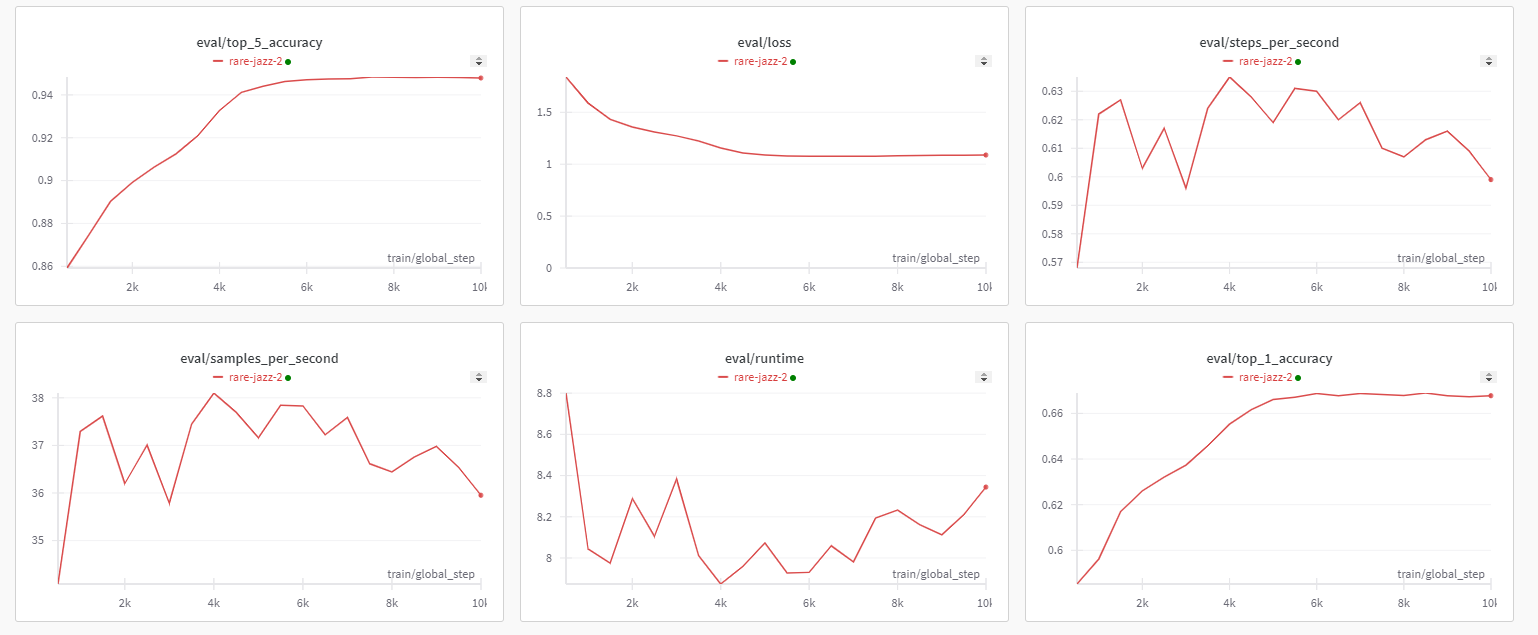
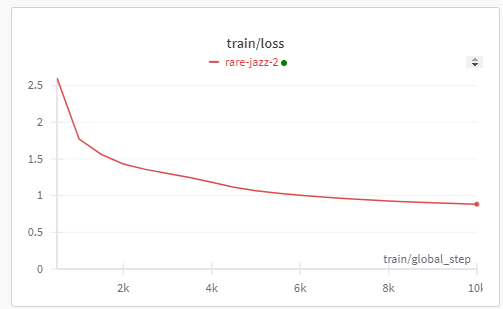

# Train S2A

In [ ]:
!python train_s2a.py --saving_path "{OUT_DIR}" --sampledir "{OUT_DIR}" --vocoder_type SPEECHTOKENIZER \
 --n_codes 1024 --n_cluster_groups 7 --metapath "{TRAIN_MANIFEST}" \
 --val_metapath "{DEV_MANIFEST}" \
 --warmup_step 1500 --nworkers 4 --first_n_lvls 7 \
 --batch_size 200 --ffd_size 1024 --hidden_size 768 --enc_nlayers 3 --dec_nlayers 6 --nheads 8 \
 --depthwise_conv_kernel_size 5 \
 --val_check_interval 60 --sample_rate 16000 --lr 5e-4 \
 --check_val_every_n_epoch 1 --n_semantic_codes 1024 \
 --distributed --precision 16

/opt/conda/lib/python3.10/site-packages/torch_audiomentations/utils/io.py:27: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")
INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
wandb: Currently logged in as: bernikov-roman-43. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.2
wandb: Run data is saved locally in ./wandb/run-20240518_121736-ljuwjh31
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run royal-meadow-2
wandb: ⭐

# Training curves
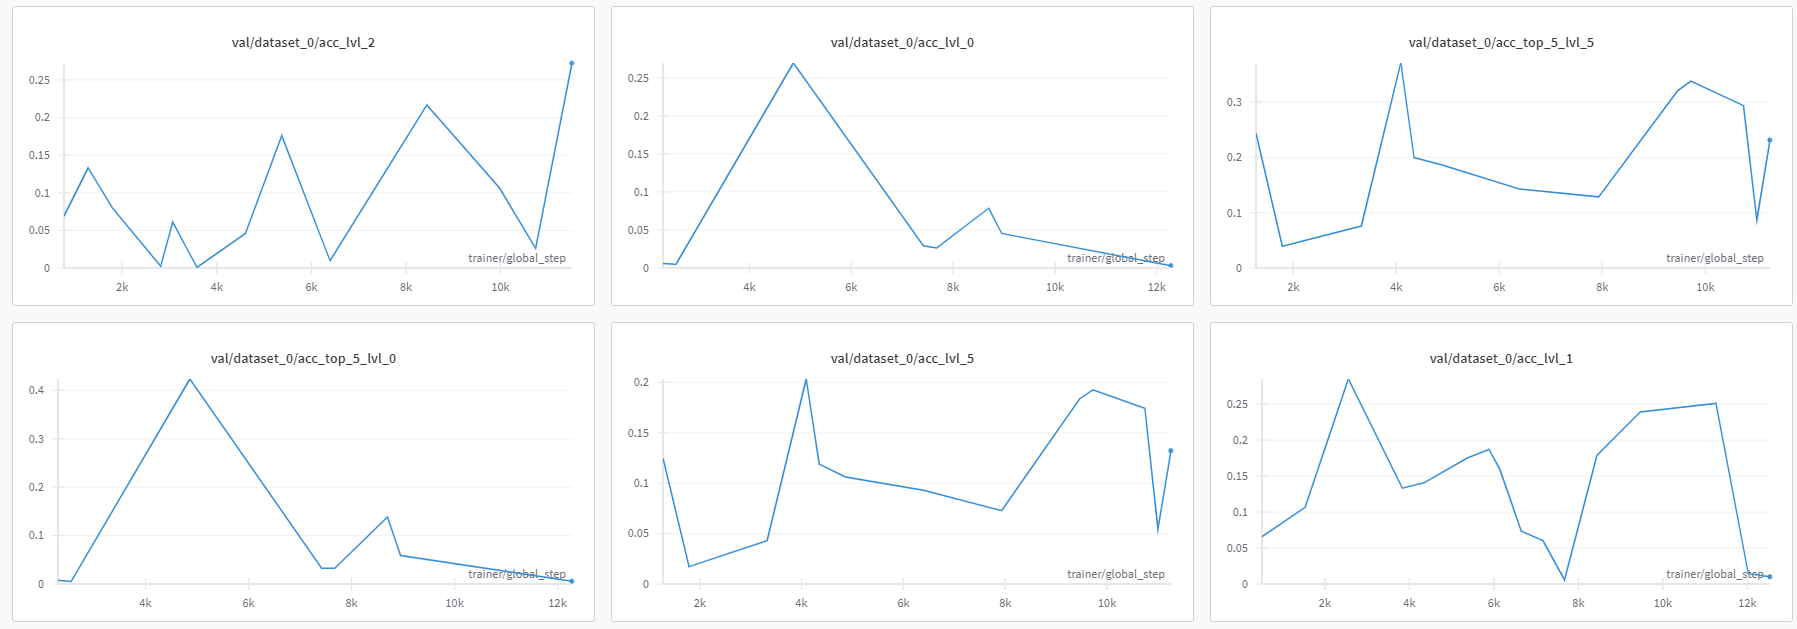 
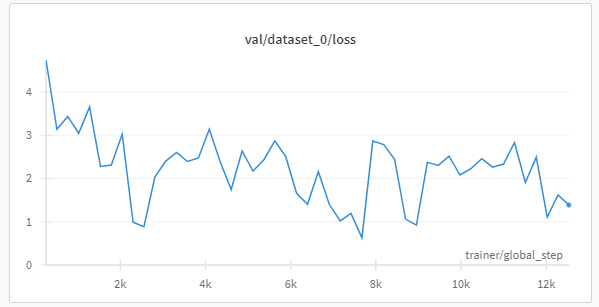
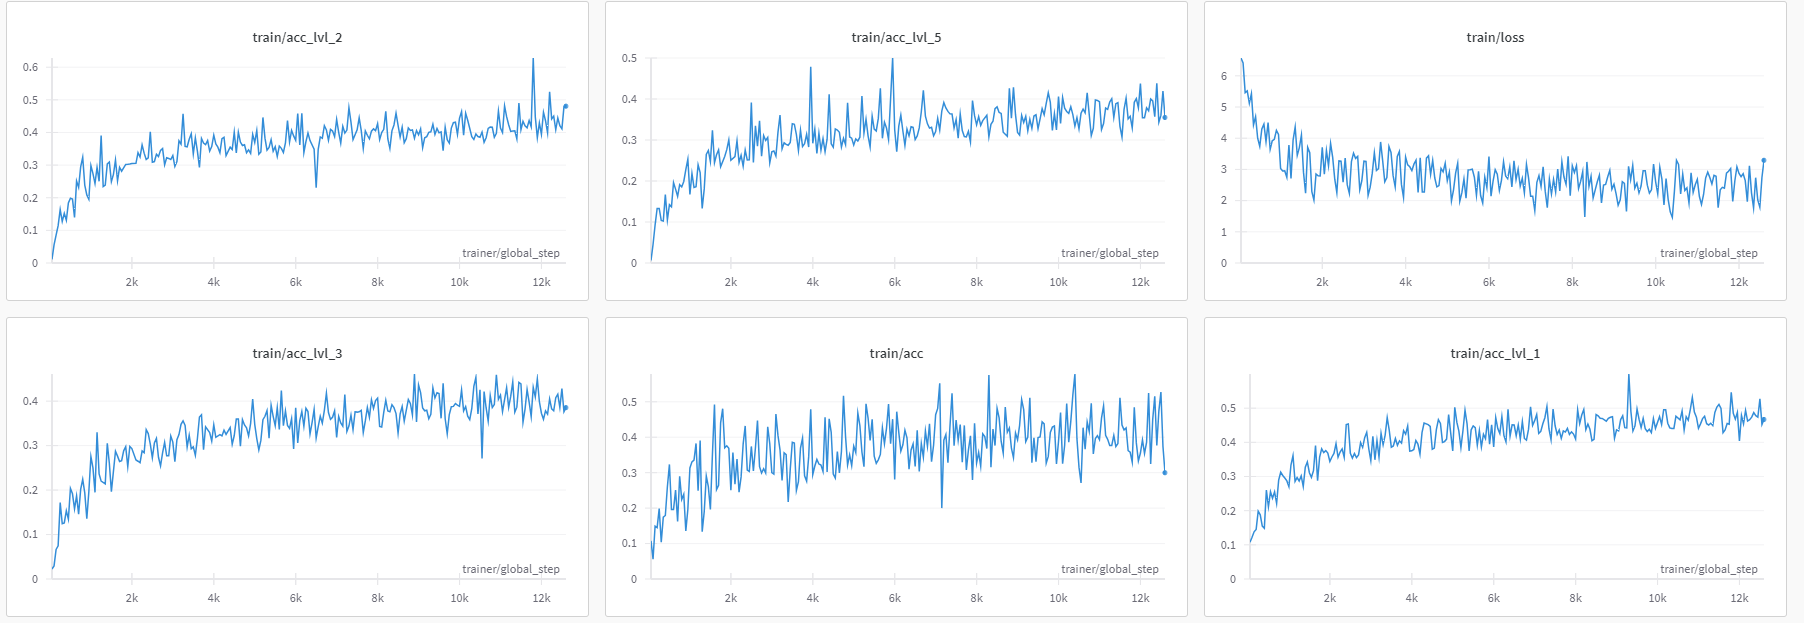